## Figure 7: Characterizing How States Manifest in the Data

This notebook recreates the figure panels included in Figure 7 of [Bolkan, Stone et al 2021](https://www.biorxiv.org/content/10.1101/2021.07.23.453573v1). It also serves as a useful tutorial notebook for users who want to run similiar analyses after fitting GLM-HMMs to their own experimental data.

The general premise of this notebook/figure, in the context of the paper, is to assess how the three states that we discovered previously (see <code>fig6.ipynb</code>) manifest in the animals' behavior. These three states correspond to distinct internal states in which the mice perform the task differently and have different responses to DMS inhibition. But that doesn't tell us things like how often the mice occupy each state or how they switch between them. We address these questions and more below.

### Import required code packages and modules

In [5]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '..')

import matplotlib.pyplot as plt
import numpy as np
import pickle

from glmhmm.utils import permute_states

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load Data
For all the plots in this figure, we'll need to use the inferred parameters that we found when fitting the GLM-HMM to our datasets. We can load those model objects now, as well as some other data we'll need. 

In [6]:
# load fit GLM-HMMS
GLMHMM_d2 = pickle.load(open('fit models/GLMHMM_d2.pickle','rb'))
GLMHMM_d1 = pickle.load(open('fit models/GLMHMM_d1.pickle','rb'))

# load additional data

# get order of permuted states
_,order_d2 = permute_states(GLMHMM_d2.w[:,:,1],method='weight value',param='weights',ix=1)
_,order_d1 = permute_states(GLMHMM_d1.w[:,:,1],method='weight value',param='weights',ix=1)

### Figure 7A/B: Plot the Transition Probabilities
These plots won't look exactly like the ones in the paper, as we made those using Adobe Illustrator. But the following visualization of the transition matrices just does as well at showing what the transition probabilities are into and out of each state.

Text(0.5, 1.0, 'direct pathway')

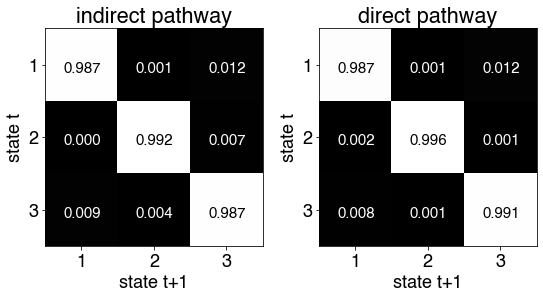

In [13]:
from glmhmm.visualize import plot_model_params

# permute order of transition probabilities
A_permuted_d2, _ = permute_states(GLMHMM_d2.A,method='order',order=order_d2.astype(int))
A_permuted_d1, _ = permute_states(GLMHMM_d1.A,method='order',order=order_d2.astype(int))

fig, axes = plt.subplots(1,2)
fig.set_size_inches(9, 4)
plot_model_params(A_permuted_d2,axes[0],precision='%.3f')
axes[0].set_title('indirect pathway')
plot_model_params(A_permuted_d1,axes[1],precision='%.3f')
axes[1].set_title('direct pathway')